# Initial look at data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cities = pd.read_csv('./archive/cities.csv')

In [3]:
primes = pd.read_csv('./archive/primes.csv',header=None)

In [4]:
cities.head()

,CityId,X,Y
0,0,316.836739,2202.340707
1,1,4377.405972,336.602082
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
4,4,1010.696952,3236.750989


In [5]:
cities.shape

(197769, 3)

In [6]:
primes.head()

,0
0,2
1,3
2,5
3,7
4,11


In [7]:
primes.shape[0]/cities.shape[0]

0.09000399455930909

In [8]:
df = cities.merge(primes,left_on='CityId',right_on=0,how='outer')

In [9]:
df['primes'] = df[0].notnull()*1

In [10]:
df.isnull().sum()

CityId         0
X              0
Y              0
0         179969
primes         0
dtype: int64

In [11]:
df.head()

,CityId,X,Y,0,primes
0,0,316.836739,2202.340707,NaN,0
1,1,4377.405972,336.602082,NaN,0
2,2,3454.158198,2820.053011,2.0,1
3,3,4688.099298,2935.898056,3.0,1
4,4,1010.696952,3236.750989,NaN,0


#### save clean

In [12]:
dfclean = df.drop(0,axis=1).rename(columns={'primes':'prime'})
dfclean.to_csv('./clean.csv',index=False)

#### save sample

In [16]:
import numpy as np
np.random.seed(3)

dfsample = dfclean.sample(100)
dfsample

# if north pole missing include
if dfsample.index.contains(0) == False:
    dfsample = dfclean[dfclean.CityId == 0].append(dfsample)
    print('adding north pole as not in sample')
    


dfsample.to_csv('./clean_s100.csv',index=False)

adding north pole as not in sample


In [15]:
pd.read_csv('./clean_small.csv')

,CityId,X,Y,prime
0,0,316.836739,2202.340707,0
1,15079,2889.264992,793.259095,0
2,166894,3577.379159,3045.207474,0
3,188954,2182.005310,3255.008018,0
4,142701,160.791040,2413.769294,0
5,195394,2138.153183,2583.288885,0
6,89384,3430.470886,2610.099023,0
7,87688,3347.729231,2961.242605,0
8,55910,3661.732653,2078.554780,0
9,22165,485.828610,2720.187890,0


In [39]:
break

SyntaxError: 'break' outside loop (<ipython-input-39-6aaf1f276005>, line 1)

# initial plotting

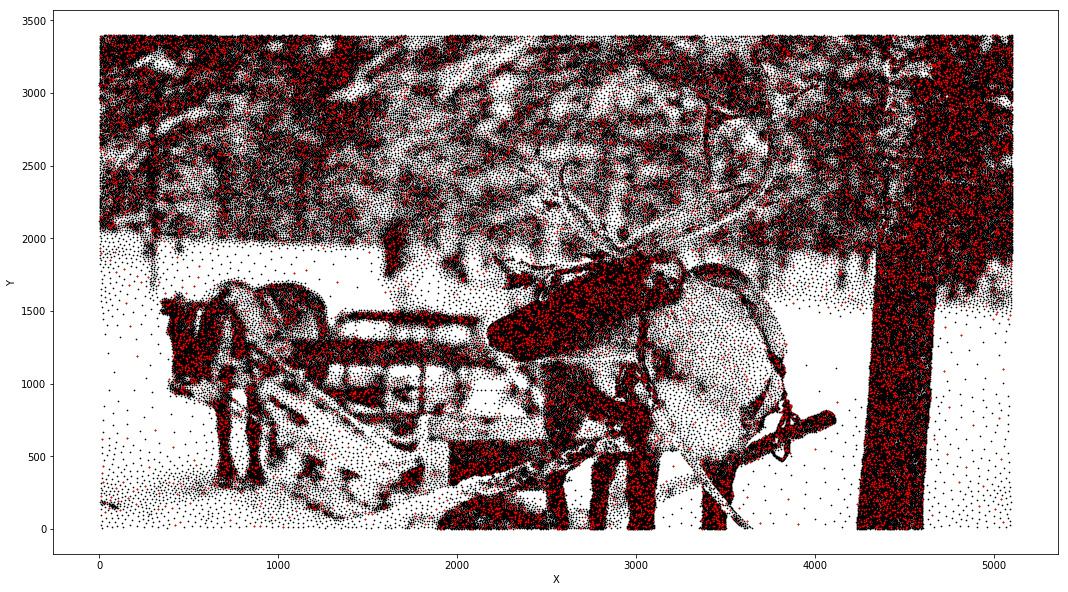

In [56]:
fig,ax = plt.subplots()
df.plot('X','Y',kind='scatter',figsize=(18,10),style='.',color='k',s = 0.5,ax=ax)
df[df['primes'] == 1].plot('X','Y',kind='scatter',figsize=(18,10),style='.',color='r',s = 0.5,ax=ax)

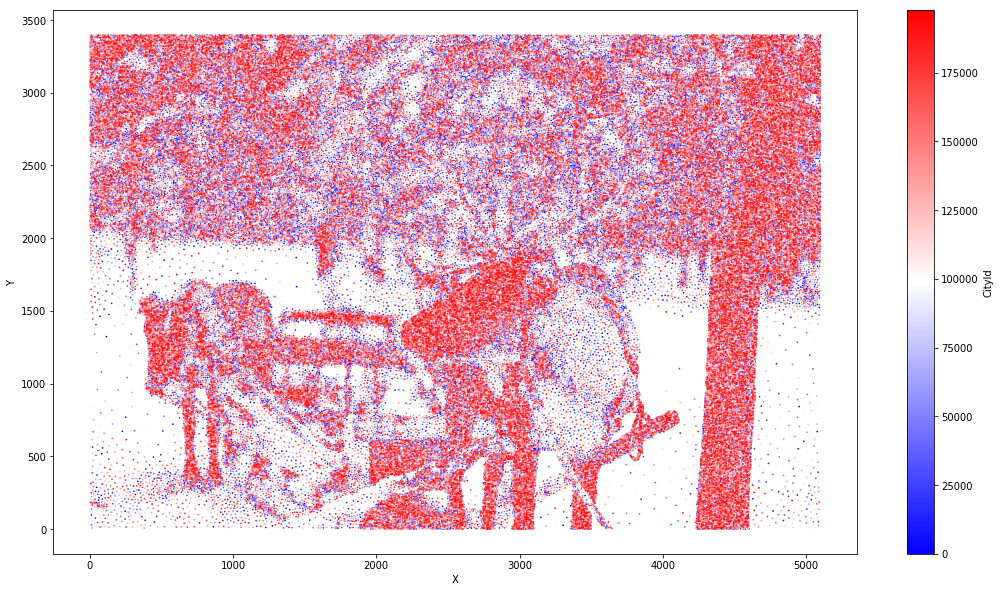

In [57]:
fig,ax = plt.subplots()
df.plot('X','Y',c='CityId',kind='scatter',figsize=(18,10),style='.',s = 0.5,ax=ax,colormap='bwr')
#df[df['primes'] == 1].plot('X','Y',kind='scatter',figsize=(18,10),style='.',color='r',s = 0.5,ax=ax)